<a href="https://colab.research.google.com/github/amadeu100401/atividade_pratica_machineLearning/blob/main/Atividade_Pratica_1_BolsaFamilia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática I - Análise de dados do bolsa família
* Alunos: Amadeu Martim Silva De Oliveira e Paulo Henrique Medeiros Bittencourt 

# Sobre a base de dados

> A base dados analisada trata-se do cadastro único do governo federal onde consta os dados sobre famílias e pessoas que pode ser utilizada para cadastrar pessoas em programas sociais, como por exemplo o Bolsa Família (Programa de transferência de renda para famílias na linha da pobreza).
Essa base dados é composta por dois arquivos, onde um é referente às familias e o outro é referente as pessoas em individual.

#Análises feitas a partir dos dados coletados

>1 -  No cenário analisado, vamos buscar uma relação com a localidade das famílias, se as mesmas vivem nos centros urbanas ou são famílias de localidades rurais, analisando também a quantidade média de membros nas famílias, bem como a renda familiar. Além disso, vamos analisar se as famílias cadastradas no bolsa família são mais indígenas, quilombolas ou não pertencentes a nenhum desses grupos.

>2 - Outro ponto analisado também, será a composição étinica do grupo de pessoas cadastradas, saíndo de um aspécto mais generalista das famílias, e indo para características pessoais de cada um, analisando sua etinia, seu grau de escolaridade, se possui algum vínculo trabalhista e quanto recebe em média.

# Links e informações úteis sobre os arquivos
* [Link sobre o guia do pesquisadores (Mais informações sobre o cadastro único)](https://aplicacoes.mds.gov.br/sagirmps/ferramentas/docs/manual_do_pesquisador_gestao_bolsa_familia_semlogo.pdf)

* [Link para baixar a base de dados](https://www.data2learning.com/repo/iachallenge/Dataset_CadastroUnico_Sergipe.zip)

* [Link para o dicionário familias](https://docs.google.com/spreadsheets/d/1oXwo2qdnKNLx9LcpVg7EfVLj6JS0S6Aj/edit#gid=1153103809)

* [Link para o dicionário da base pessoas](https://docs.google.com/spreadsheets/d/1oXwo2qdnKNLx9LcpVg7EfVLj6JS0S6Aj/edit#gid=732501451)

O arquivo está em formato .zip e é composto por três outros arquivos:

* data_familia_sergipe.csv: dados das famílias.
* data_pessoas_sergipe.csv: dadaos das pessoas.
* Dicionario_base_desidentificada_pt.xlsx: dicionário de dados explicando o que é cada uma dos campos das bases.

#Alguma considerações importantes: 

>* As bases de dados fornecidas para análise são referentes ao Cadastro Único do governo federal, por tanto, este cadastro pode ser usado em diversos programas governamentais, fora o Bolsa Família, tal quais como o Tarifa Social de Energia Elétrica, o Minha Casa Minha Vida e entre outros. 

>* Todas as pessoas cadastradas nas bases de dados não possuem nenhum identificação, como CPFs, RGs ou CEPs. Sendo assim, tratam-se de dados de pessoas anônimas.

In [124]:
# Importação das bibliotecas
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [125]:
# Importação da base de dados familias
data_familia = pd.read_csv("/content/drive/MyDrive/Análise de dados/data_familia_sergipe.csv")
data_familia


,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,2806206,2,3,183415.0,2006-01-07,2018-09-30,58.0,2018-02-27,1.0,1.0,...,2.0,2.0,P S IVA SALGUEIRO,2421836.0,CRAS CENTRO DE REFERENCIA DA ASSISTENCIA SOCIAL,2.806200e+10,0.0,0,4,550052838636015
1,2803609,2,3,183416.0,2010-03-09,2018-09-30,190.0,2018-07-20,2.0,1.0,...,2.0,2.0,POSTO DE SAUDE RICARDO HAGENBECK,2421380.0,CRAS ANGELA MARIA DE CARVALHO LIMA BOMFIM,2.803602e+10,0.0,0,5,550245146328323
2,2803203,2,3,183417.0,2006-02-25,2018-09-30,100.0,2018-08-21,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550305936601879
3,2805703,2,3,183418.0,2004-05-25,2017-12-15,937.0,2017-11-09,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,0,1,550405659971983
4,2805307,1,3,183419.0,2016-03-31,2018-10-15,25.0,2018-10-15,2.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550245146328323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,2800308,2,1,4250243.0,2018-12-05,2018-12-05,100.0,2018-12-05,1.0,1.0,...,2.0,2.0,US JOSE QUINTILIANO DA FONSECA SOBRAL CIDADE NOVA,2771.0,CRAS RISOLETA NEVES,2.800300e+10,0.0,1,3,550245146328323
82271,2800308,2,1,4250244.0,2012-10-15,2018-10-01,8.0,2018-08-13,1.0,1.0,...,2.0,2.0,US JOAO BEZERRA AREIA BRANCA,3425.0,CRAS ANTONIO VALENCA ROLLEMBERG,2.800300e+10,0.0,1,3,550245146328323
82272,2800308,2,1,4250245.0,2016-10-19,2018-10-01,97.0,2017-10-18,1.0,1.0,...,2.0,2.0,US ADEL NUNES BAIRRO AMERICA,2305.0,CRAS ENEDINA BOMFIM SANTOS,2.800302e+10,0.0,1,3,550245146328323
82273,2800308,2,1,4250246.0,2016-05-10,2016-05-10,880.0,2016-05-10,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,0,1,550245146328323


In [126]:
#Usando o método de describe com todas as colunas da tabela
#data_familia.describe()

#Algumas considerações sobre as colunas das bases da dados
>Iremos montar duas tabelas apenas com as colunas que são relevantes ao nosso estudo de caso, por tanto, iremos desconsiderar outros aspéctos, como data em que tal família se increveu no programa. 


# Legenda sobre as colunas da tabela.

Aqui está uma tabela relacionando as colunas utilizadas com suas respectivas definições e seus valores


---



| Atributo | Definição | Chave dos valores |
|:--------|:--------:|:--------:|
|id_familia| ID de identificação da família |
| cod_local_domic_fam | Se a família mora na zona urbana ou rual | 1 = Urbano e 2 = Rural |
| cod_familia_indigena_fam | Se a família é indigena | 1 = sim e 2 = não |
| ind_familia_quilombola_fam | Se a família é quilombola | 1= sim e 2 = não |
| vlr_renda_media_fam | Renda média da família | Valor em reais |
| qtde_pessoas | Quantidades de pessoas na família | |



In [127]:
#Montando uma tabela nova com as colunas que serão analisadas utilizando a base DATA_FAMÍLIA
df_familia = data_familia.iloc[:,[3,8,21,22,6,29]]
df_familia['cod_local_domic_fam'] = pd.cut(df_familia['cod_local_domic_fam'],bins=[1.0,2.0,float("inf")],right=False,labels=['Urbano','Rural'])
df_familia['cod_familia_indigena_fam'] = pd.cut(df_familia['cod_familia_indigena_fam'],bins=[1.0,2.0,float("inf")],right=False,labels=['Sim','Não'])
df_familia['ind_familia_quilombola_fam'] = pd.cut(df_familia['ind_familia_quilombola_fam'],bins=[1.0,2.0,float("inf")],right=False,labels=['Sim','Não'])
df_familia.head(20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,id_familia,cod_local_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,vlr_renda_media_fam,qtde_pessoas
0,183415.0,Urbano,Não,Não,58.0,4
1,183416.0,Rural,Não,Não,190.0,5
2,183417.0,Urbano,Não,Não,100.0,2
3,183418.0,Urbano,Não,Não,937.0,1
4,183419.0,Rural,Não,Não,25.0,2
5,183420.0,Urbano,Não,Não,37.0,2
6,183421.0,Rural,Não,Não,50.0,3
7,183422.0,Urbano,Não,Não,41.0,3
8,183424.0,Rural,Não,Não,50.0,3
9,183425.0,Urbano,Não,Não,50.0,1


id_familia                    82275
cod_local_domic_fam           82170
cod_familia_indigena_fam      82275
ind_familia_quilombola_fam    82245
vlr_renda_media_fam           82275
qtde_pessoas                  82275
dtype: int64

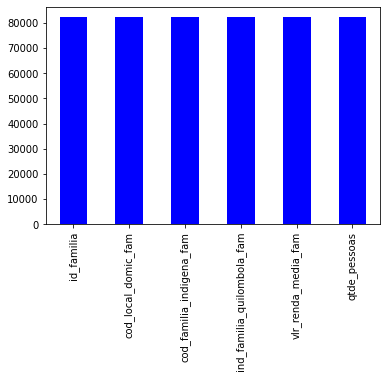

In [128]:
#Verificando balanceamento dos dados
count_ = df_familia.count()
count_.plot(kind='bar',color='blue')
count_

# Sobre a quantidade de dados
Podemos perceber que existe uma leve diferença na quantidade de dados pertencentes em cada coluna da tabela.
Porém essa diferença não afetará de forma significativa nos nossos resultados finais. 


In [129]:
#Quantidade de pessoas por cada localidade
localidade= df_familia['cod_local_domic_fam'].value_counts().to_frame()
localidade.rename(columns = {'cod_local_domic_fam' : 'Local de moradia'}, inplace = True)

localidade

,Local de moradia
Urbano,55464
Rural,26706


In [130]:
#Quantidade quantidade de pessoas indígenas
qtd_ind = df_familia['cod_familia_indigena_fam'].value_counts().to_frame()
qtd_ind.rename(columns = {'cod_familia_indigena_fam' : 'Famílias indígenas'}, inplace = True)

qtd_ind

,Famílias indígenas
Não,82245
Sim,30


In [131]:
#Qunatidade de famílias quiombolas
qtd_qui = df_familia['ind_familia_quilombola_fam'].value_counts().to_frame()
qtd_qui.rename(columns = {'ind_familia_quilombola_fam' : 'Famílias quilombolas'}, inplace = True)

qtd_qui

,Famílias quilombolas
Não,81737
Sim,508


In [132]:
#Valor máximo e mínimo de renda e média
renda = df_familia[["vlr_renda_media_fam"]]
valor_media_salarial = df_familia['vlr_renda_media_fam'].mean()
print(f"Valor da renda mínima: {renda.min()}")
print(f"Valor da renda máxima: {renda.max()}")
print(f'Média da renda mensal: R${valor_media_salarial }')

Valor da renda mínima: vlr_renda_media_fam    0.0
dtype: float64
Valor da renda máxima: vlr_renda_media_fam    2811.0
dtype: float64
Média da renda mensal: R$218.44741415982983


In [133]:
#Verificando o intervalo da quantidade de pessoas por família e média de pessoas
data_features = df_familia[["qtde_pessoas"]]
valor_media_pessoas = df_familia['qtde_pessoas'].mean()
print(f"Quantidade mínima de membros: {data_features.min()}")
print(f"Quantidade máxima de membros: {data_features.max()}")
print(f'Média de pessoas por família é de: {valor_media_pessoas } pessoa(as)')

Quantidade mínima de membros: qtde_pessoas    1
dtype: int64
Quantidade máxima de membros: qtde_pessoas    14
dtype: int64
Média de pessoas por família é de: 2.511188088726831 pessoa(as)


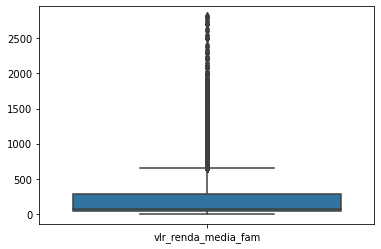

In [134]:
#Verificando se existe outliers na renda famíliar
df_renda = data_familia.iloc[:,[6]]
sns.boxplot(data=df_renda)

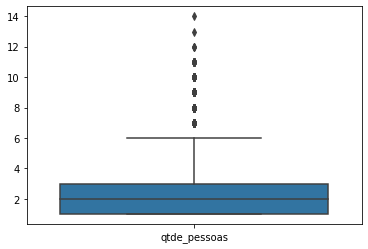

In [135]:
#Verificando se existe outliers na renda famíliar
df_qtdPessoas = data_familia.iloc[:,[29]]
sns.boxplot(data=df_qtdPessoas)

# Extraíndo dados da base de Pessoas

In [136]:
#Importando base de dados pessoas 
data_pessoas = pd.read_csv("/content/drive/MyDrive/Análise de dados/data_pessoas_sergipe.csv")
data_pessoas

,cd_ibge,estrato,classf,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,...,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,val_renda_bruta_12_meses_memb,val_renda_doacao_memb,val_renda_aposent_memb,val_renda_seguro_desemp_memb,val_renda_pensao_alimen_memb,val_outras_rendas_memb,peso.fam,peso.pes
0,2805208,1,3,206870.0,24.0,1,19,1,4.0,1.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,100.0,550245146328323,563273265962979
1,2805505,2,3,1936145.0,35.0,1,17,3,4.0,1.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,550245146328323,563340413648347
2,2800308,2,1,4239973.0,103.0,1,4,3,4.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,550245146328323,56328235405831
3,2805604,2,3,2022175.0,324.0,2,4,3,4.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,100.0,NaN,550390600873778,563301639311753
4,2801306,2,3,2300485.0,328.0,1,7,3,2.0,2.0,...,NaN,NaN,NaN,NaN,0.0,NaN,100.0,NaN,550361832442675,563323831491962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205609,2806206,2,3,197669.0,12852035.0,1,33,2,4.0,2.0,...,1.0,12.0,3600.0,0.0,0.0,0.0,0.0,0.0,550052838636015,563276393161791
205610,2800308,2,1,4240579.0,12852064.0,1,5,3,4.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,550245146328323,56328235405831
205611,2801207,2,3,2110068.0,12852104.0,1,18,3,4.0,2.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,550381758350181,563276393161791
205612,2804508,2,3,2529321.0,12852434.0,1,56,2,4.0,1.0,...,1.0,5.0,500.0,0.0,0.0,0.0,0.0,0.0,550146136427333,563276393161791


# Legenda sobre as colunas das tabela que seram utilizadas.

Aqui está uma tabela relacionando as colunas utilizadas com suas respectivas definições e seus valores


---



| Atributo | Definição | Chave dos valores |
|:--------|:--------:|:--------:|
|cod_sexo_pessoa| Sexo da pessoas | 1 = Masculino e 2 = Feminino
| idade | Idade de cada pessoa | 
| cod_raca_cor_pessoa | Raça de cada pessoas | 1 = Branco, 2 = Preto, 3 = Amarelo e 4 = Indígena |
| cod_certidao_registrada_pessoa | Situação da certidão de nascimento de cada pessoa | 1 = Cadastrada e possua a certidão , 2 = Cadastrada mas não possui, 3 = Não cadastrada e 4 = Não sabe |
| cod_sabe_ler_escrever_memb | Se a pessoas sabe ler e escrever | 1= sim e 2 = não |
| ind_frequenta_escola_memb | Se a pessoa frequenta ou já frequentou a escola | 1 = Sim,rede pública , 2 = rede particular, 3 = Não, já frequentou e 4 = Nunca frequentou |
| cod_curso_frequenta_memb | Curso que a pessoa frequenta | Os valores para cada chave ficaram disponíveis em uma tabela abaixo:
| ***#Chave#*** | ***#Valor#*** |
| 1| creche |
| 2| Pré-escola (exceto CA) |
| 3| Classe de alfabetização (CA)|
| 4| Ensino fundamental regular (duração 8 anos)|
| 5| Ensino fundamental regular (duração 9 anos)|
| 6| Ensino fundamental especial |
| 7| Ensino médio regular |
| 8| Ensino médio especial |
| 9| Ensino fundamental EJA (1ª à 4ª) |
| 10 | Ensino médio fundamental EJA (5ª à 8ª) |
| 11 | Ensino médio EJA|
| 12 | Alfabetização p/ adultos|
| 13 | Supeior,especialização, mestrado, doutorado|
| 14 | Pré vestibular|
| NaN | Não está cursando nada |
| cod_curso_frequentou_pessoa_memb | Curso que a pessoa frequentou | Os valores para cada chave fiacaram disponíveis em uma tabela abaixo |
| ***#Chave#*** | ***#Valor#*** |
| 1| creche |
| 2| Pré-escola (exceto CA) |
| 3| Classe de alfabetização (CA)|
| 4| Ensino fundamental regular (duração 8 anos)|
| 5| Ensino fundamental regular (duração 9 anos)|
| 6| Ensino fundamental especial |
| 7| Ensino médio regular |
| 8| Ensino médio especial |
| 9| Ensino fundamental EJA (1ª à 4ª) |
| 10 | Ensino médio fundamental EJA (5ª à 8ª) |
| 11 | Ensino médio EJA|
| 12 | Alfabetização p/ adultos|
| 13 | Supeior,especialização, mestrado, doutorado|
| 14 | Pré vestibular|
| NaN | Não cursou nada |
| cod_principal_trab_memb | Função principal de cada pessoa no trabalho | Os valores de cada chave estaram em uma tabela abaixo|
| ***#Chave#*** | ***#Valor#*** |
| 1| Trabalhador por conta própia (autônomo, bico) |
|2 |Empregado sem carteira assinada|
| 3| Trabalhador temporário em área rural |
| 4| Trabalhador com carteira assinada |
| 5| Trabalhador doméstco sem carteira de trabalho|
| 6| Trabalhador doméstico com carteira de trabalho assinada|
| 7| Trabalhador não remunerado |
| 8| Militar ou servidor público |
| 9| Empregador |
| 10| Estagiário |
| 11 | Aprendiz |
| NaN | Não trabalhando |
| val_renda_bruta_12_meses_memb | Valor da renda bruta por cada pessoa nos últimos 12 meses | valor em reais



In [137]:
#Montando uma tabela nova com as colunas que serão analisadas utilizando a base DATA_PESSOAS
df_pessoas = data_pessoas.iloc[:,[5,6,8,10,12,13,15,17,23,27]]
df_pessoas['cod_sexo_pessoa'] = pd.cut(df_pessoas['cod_sexo_pessoa'],bins=[1.0,2.0,float("inf")],right=False,labels=['Masculino','Feminino'])
df_pessoas['cod_raca_cor_pessoa'] = pd.cut(df_pessoas['cod_raca_cor_pessoa'],bins=[1.0,2.0,3.0,4.0,float("inf")],right=False,labels=['Branca','Preta','Amarela','Indígena'])
df_pessoas['cod_certidao_registrada_pessoa'] = pd.cut(df_pessoas['cod_certidao_registrada_pessoa'],bins=[1.0,2.0,3.0,4.0,float("inf")],right=False,labels=['Cadastrada','Cadastrada mas não tem o documento','Não cadastrada','Não sabe'])
df_pessoas['cod_sabe_ler_escrever_memb'] = pd.cut(df_pessoas['cod_sabe_ler_escrever_memb'],bins=[1.0,2.0,float("inf")],right=False,labels=['Sabe ler/escrever','Não sabe ler/escrever'])
df_pessoas['ind_frequenta_escola_memb'] = pd.cut(df_pessoas['ind_frequenta_escola_memb'],bins=[1.0,2.0,3.0,4.0,float("inf")],right=False,labels=['Sim,rede pública','Sim, rede privada','Não, já frequentou','Nunca frequentou'])
df_pessoas['cod_curso_frequenta_memb'] = pd.cut(df_pessoas['cod_curso_frequenta_memb'],bins=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,float("inf")],right=False,labels=['Creche','Pré-escola','Classe de alfabetização','Esino fundamental regular (8 anos)','Ensino fundamental regular (9 anos)','Esino fundamental especial','Esino médio regular','Ensino médio especial','Esino fundamental EJA (1ª a 4ª)','Ensino fundamental EJA (5ª a 8ª)','Ensino médio EJA','Alfabetização p/ adultos','Supeior,especialização, mestrado, doutorado','Pré vestibular'])
df_pessoas['cod_curso_frequentou_pessoa_memb'] = pd.cut(df_pessoas['cod_curso_frequentou_pessoa_memb'],bins=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,float("inf")],right=False,labels=['Creche','Pré-escola','Classe de alfabetização','Esino fundamental regular (8 anos)','Ensino fundamental regular (9 anos)','Esino fundamental especial','Esino médio regular','Ensino médio especial','Esino fundamental EJA (1ª a 4ª)','Ensino fundamental EJA (5ª a 8ª)','Ensino médio EJA','Alfabetização p/ adultos','Supeior,especialização, mestrado, doutorado','Pré vestibular'])
df_pessoas['cod_principal_trab_memb'] = pd.cut(df_pessoas['cod_principal_trab_memb'],bins=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,float("inf")],right=False,labels=['Trabalhador por conta própia (autônomo, bico)','Empregado sem carteira assinada','Trabalhador temporário em área rural','Trabalhador com carteira assinada','Trabalhador doméstco sem carteira de trabalho','	Trabalhador doméstico com carteira de trabalho assinada','Trabalhador não remunerado','Militar ou servidor público','Empregador','Estagiário','Aprendiz'])

df_pessoas.head(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,cod_sexo_pessoa,idade,cod_raca_cor_pessoa,cod_certidao_registrada_pessoa,cod_sabe_ler_escrever_memb,ind_frequenta_escola_memb,cod_curso_frequenta_memb,cod_curso_frequentou_pessoa_memb,cod_principal_trab_memb,val_renda_bruta_12_meses_memb
0,Masculino,19,Indígena,Cadastrada,Sabe ler/escrever,"Sim,rede pública",Esino médio regular,NaN,NaN,NaN
1,Masculino,17,Indígena,Cadastrada,Sabe ler/escrever,"Sim,rede pública",Esino médio regular,NaN,NaN,NaN
2,Masculino,4,Indígena,Cadastrada,Não sabe ler/escrever,Nunca frequentou,NaN,NaN,NaN,NaN
3,Feminino,4,Indígena,Cadastrada,Não sabe ler/escrever,"Sim,rede pública",Pré-escola,NaN,NaN,NaN
4,Masculino,7,Preta,Cadastrada,Sabe ler/escrever,"Sim,rede pública",Ensino fundamental regular (9 anos),NaN,NaN,NaN
5,Feminino,7,Indígena,Cadastrada,Não sabe ler/escrever,"Sim,rede pública",Ensino fundamental regular (9 anos),NaN,NaN,NaN
6,Masculino,21,Indígena,Cadastrada,Sabe ler/escrever,"Não, já frequentou",NaN,Ensino fundamental regular (9 anos),NaN,NaN
7,Masculino,11,Preta,Cadastrada,Sabe ler/escrever,"Sim,rede pública",Ensino fundamental regular (9 anos),NaN,NaN,NaN
8,Feminino,7,Indígena,Cadastrada,Não sabe ler/escrever,"Sim,rede pública",Classe de alfabetização,NaN,NaN,NaN
9,Feminino,13,Indígena,Cadastrada mas não tem o documento,Sabe ler/escrever,"Sim,rede pública",Ensino fundamental regular (9 anos),NaN,NaN,NaN


cod_sexo_pessoa                     205614
idade                               205614
cod_raca_cor_pessoa                 205558
cod_certidao_registrada_pessoa      205614
cod_sabe_ler_escrever_memb          205593
ind_frequenta_escola_memb           205593
cod_curso_frequenta_memb             67050
cod_curso_frequentou_pessoa_memb    105737
cod_principal_trab_memb              54201
val_renda_bruta_12_meses_memb        54223
dtype: int64

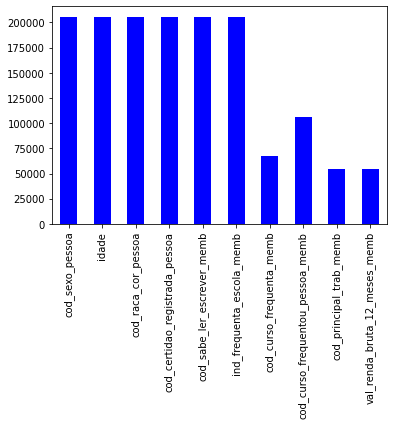

In [138]:
#Verificando balanceamento dos dados
count_ = df_pessoas.count()
count_.plot(kind='bar',color='blue')
count_

# Sobre a quantidade de dados
Podemos perceber aqui algumas diferenças numéricas nas quantidades de certas tabelas. Porém, mesmo sendo valores elevados, são tabelas que caso não preenchidas indicam que aquela coluna pode não representar especificamente uma pessoa, por exemplo, a coluna *cod_curso_frequenta_memb* representa apenas as pessoas que estam frequentando um curso atualmente. Por isso, não será necessarimente preciso realizar nenhum tratamento nesses dados. Em contra partida, nas colunas  ***cod_sexo_pessoa	idade	cod_raca_cor_pessoa	cod_certidao_registrada_pessoa	cod_sabe_ler_escrever_memb	ind_frequenta_escola_memb***, onde não poderia haver uma discrepância muito acentuada, podemos ver que os números estão com pequenas diferenças que não influênciarão nos resultados

# Fazendo a contagem dos elementos por cada coluna

,cod_sexo_pessoa
Feminino,116695
Masculino,88919


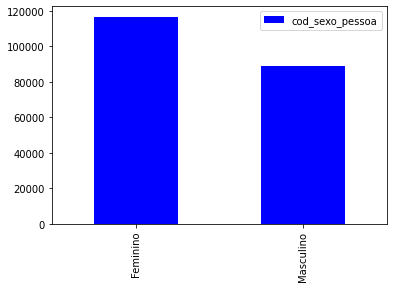

In [175]:
#Quantidade de pessoas de cada sexo
qtd_sexo = df_pessoas['cod_sexo_pessoa'].value_counts().to_frame()
c = qtd_sexo
c.plot(kind="bar",color="blue")
qtd_ind.rename(columns = {'cod_sexo_pessoa' : 'Sexo'}, inplace = True)

qtd_sexo

In [140]:
#Valor faixa de idades
idade = df_pessoas[["idade"]]
#Renda das famílias
valor_media_idade = df_pessoas['idade'].mean()
print(f"Valor da idade: {idade.min()}")
print(f"Valor da idade máxima: {idade.max()}")
print(f'Média de idade das pessoas cadastradas é de:{valor_media_idade } anos')

Valor da renda mínima: idade    0
dtype: int64
Valor da renda máxima: idade    112
dtype: int64
Média de idade das pessoas cadastradas é de:25.832720534593946 anos


,Raça
Indígena,166894
Branca,27640
Preta,9997
Amarela,1027


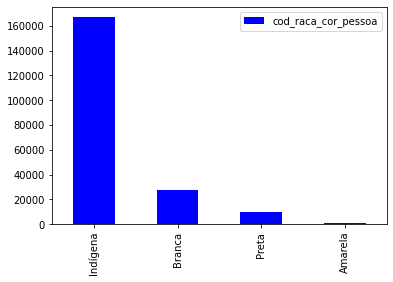

In [173]:
#Quantidade de pessoas de cada raça
qtd_raca = df_pessoas['cod_raca_cor_pessoa'].value_counts().to_frame()
c = qtd_raca
c.plot(kind="bar",color="blue")
qtd_raca.rename(columns = {'cod_raca_cor_pessoa' : 'Raça'}, inplace = True)

qtd_raca


,Situação dos registros de nascimento
Cadastrada,180731
Cadastrada mas não tem o documento,24855
Não cadastrada,28
Não sabe,0


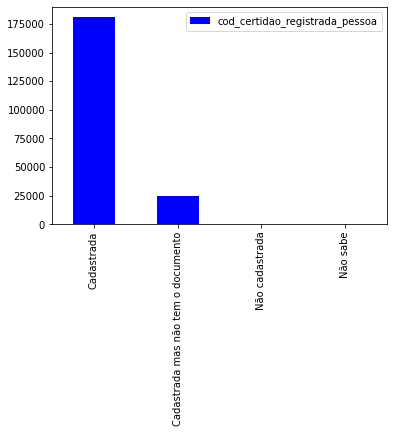

In [172]:
#Situação dos registrados de nascimento de cada pessoa
qtd_registro = df_pessoas['cod_certidao_registrada_pessoa'].value_counts().to_frame()
c = qtd_registro
c.plot(kind="bar",color="blue")
qtd_registro.rename(columns = {'cod_certidao_registrada_pessoa' : 'Situação dos registros de nascimento'}, inplace = True)

qtd_registro

,Situação quanto a leitura e escrita
Sabe ler/escrever,150732
Não sabe ler/escrever,54861


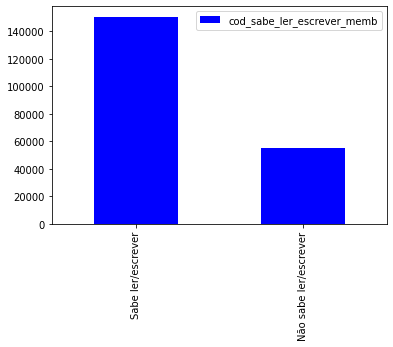

In [171]:
#Situação das pessoas quanto a ler e escrever
qtd_ler = df_pessoas['cod_sabe_ler_escrever_memb'].value_counts().to_frame()
c = qtd_ler
c.plot(kind="bar",color="blue")
qtd_ler.rename(columns = {'cod_sabe_ler_escrever_memb' : 'Situação quanto a leitura e escrita'}, inplace = True)

qtd_ler

,Situação quanto a ida à escola
"Não, já frequentou",105749
"Sim,rede pública",59196
Nunca frequentou,32783
"Sim, rede privada",7865


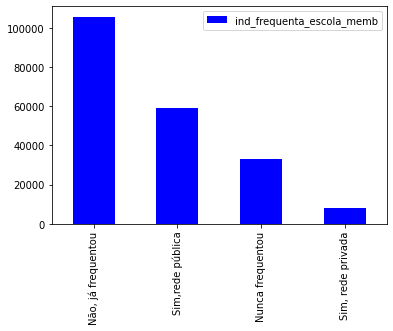

In [170]:
#Situação das pessoas quanto a ida à escola
qtd_escola = df_pessoas['ind_frequenta_escola_memb'].value_counts().to_frame()
c = qtd_escola
c.plot(kind="bar",color="blue")
qtd_escola.rename(columns = {'ind_frequenta_escola_memb' : 'Situação quanto a ida à escola'}, inplace = True)

qtd_escola

,Situação de pessoas que cursam algo atualmente
Ensino fundamental regular (9 anos),42416
Esino médio regular,8645
Esino fundamental regular (8 anos),5139
Pré-escola,4764
Classe de alfabetização,1388
Ensino fundamental EJA (5ª a 8ª),1370
Creche,1286
Ensino médio EJA,665
"Supeior,especialização, mestrado, doutorado",614
Esino fundamental EJA (1ª a 4ª),296


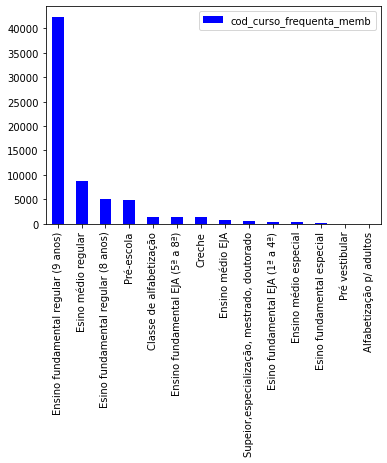

In [169]:
#Situação de pessoas que cursam algo atualmente
qtd_cursando = df_pessoas['cod_curso_frequenta_memb'].value_counts().to_frame()
c = qtd_cursando
c.plot(kind="bar",color="blue")
qtd_cursando.rename(columns = {'cod_curso_frequenta_memb' : 'Situação de pessoas que cursam algo atualmente'}, inplace = True)

qtd_cursando

,Situação de pessoas que já cursaram algo
Ensino médio especial,33614
Esino fundamental regular (8 anos),31642
Ensino fundamental regular (9 anos),26733
Esino fundamental especial,7179
"Supeior,especialização, mestrado, doutorado",2125
Esino fundamental EJA (1ª a 4ª),1128
Ensino médio EJA,786
Alfabetização p/ adultos,655
Classe de alfabetização,585
Esino médio regular,534


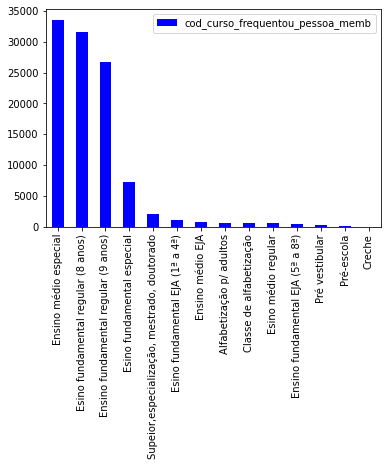

In [167]:
#Situação de pessoas que já cursaram algo
qtd_cursou = df_pessoas['cod_curso_frequentou_pessoa_memb'].value_counts().to_frame()
c = qtd_cursou
c.plot(kind="bar",color="blue")
qtd_cursou.rename(columns = {'cod_curso_frequentou_pessoa_memb' : 'Situação de pessoas que já cursaram algo'}, inplace = True)

qtd_cursou


,Situação de cargo e situação trabalhista das pessoas
"Trabalhador por conta própia (autônomo, bico)",27864
Empregado sem carteira assinada,16689
Trabalhador com carteira assinada,5441
Militar ou servidor público,1167
Trabalhador temporário em área rural,1004
Trabalhador doméstco sem carteira de trabalho,764
Trabalhador não remunerado,630
\tTrabalhador doméstico com carteira de trabalho assinada,364
Aprendiz,146
Estagiário,107


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


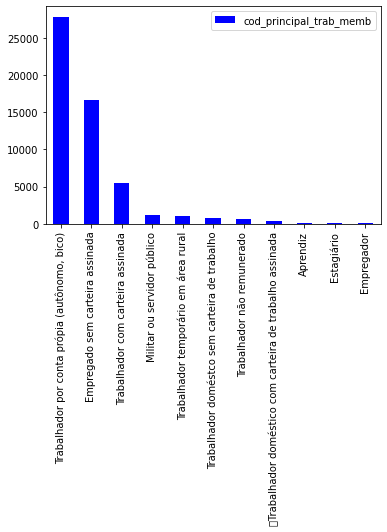

In [165]:
#Situação de cargo e situação trabalhista das pessoas
qtd_trabalho = df_pessoas['cod_principal_trab_memb'].value_counts().to_frame()
c = qtd_trabalho
c.plot(kind="bar",color="blue")
qtd_trabalho.rename(columns = {'cod_principal_trab_memb' : 'Situação de cargo e situação trabalhista das pessoas'}, inplace = True)

qtd_trabalho



In [162]:
#Valor máximo e mínimo de renda e média
rendap = df_pessoas[["val_renda_bruta_12_meses_memb"]]
valor_media_renda = df_pessoas['val_renda_bruta_12_meses_memb'].mean()
print(f"Valor da renda anual mínima: {rendap.min()}")
print(f"Valor da renda anual máxima: {rendap.max()}")
print(f'Média da renda anual: R${valor_media_renda }')

Valor da renda anual mínima: val_renda_bruta_12_meses_memb    0.0
dtype: float64
Valor da renda anual máxima: val_renda_bruta_12_meses_memb    96100.0
dtype: float64
Média da renda anual: R$3166.8268262545416
